<a href="https://colab.research.google.com/github/Jamilbarbosa/Jornalismo-/blob/main/Dados_da_vacina%C3%A7%C3%A3o_Em_PE_Open_DataSUS_05_de_maio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
## Importando a biblioteca PANDAS e o DATA FRAME da vacinação do Open DataSUS

import pandas as pd

!wget -P "/content/drive/MyDrive/Vacina covid" https://s3-sa-east-1.amazonaws.com/ckan.saude.gov.br/PNI/vacina/uf/2021-05-05/uf%3DPE/part-00000-9a0b7e60-9729-42c8-b7c6-8c3a19c80ee8.c000.csv


--2021-05-06 19:21:17--  https://s3-sa-east-1.amazonaws.com/ckan.saude.gov.br/PNI/vacina/uf/2021-05-05/uf%3DPE/part-00000-9a0b7e60-9729-42c8-b7c6-8c3a19c80ee8.c000.csv
Resolving s3-sa-east-1.amazonaws.com (s3-sa-east-1.amazonaws.com)... 52.95.164.34
Connecting to s3-sa-east-1.amazonaws.com (s3-sa-east-1.amazonaws.com)|52.95.164.34|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1050181800 (1002M) [text/csv]
Saving to: ‘/content/drive/MyDrive/Vacina covid/part-00000-9a0b7e60-9729-42c8-b7c6-8c3a19c80ee8.c000.csv.1’

part-00000-9a0b7e60 100%[===================>]   1002M  10.2MB/s    in 1m 40s  

2021-05-06 19:22:58 (9.97 MB/s) - ‘/content/drive/MyDrive/Vacina covid/part-00000-9a0b7e60-9729-42c8-b7c6-8c3a19c80ee8.c000.csv.1’ saved [1050181800/1050181800]



In [2]:
## Nomeando o DATAFRAME

dados = pd.read_csv("/content/drive/MyDrive/Vacina covid/part-00000-9a0b7e60-9729-42c8-b7c6-8c3a19c80ee8.c000.csv", sep=";")

In [3]:
## Amostra de 10 linhas para consulta

dados.head(10)

,document_id,paciente_id,paciente_idade,paciente_dataNascimento,paciente_enumSexoBiologico,paciente_racaCor_codigo,paciente_racaCor_valor,paciente_endereco_coIbgeMunicipio,paciente_endereco_coPais,paciente_endereco_nmMunicipio,paciente_endereco_nmPais,paciente_endereco_uf,paciente_endereco_cep,paciente_nacionalidade_enumNacionalidade,estabelecimento_valor,estabelecimento_razaoSocial,estalecimento_noFantasia,estabelecimento_municipio_codigo,estabelecimento_municipio_nome,estabelecimento_uf,vacina_grupoAtendimento_codigo,vacina_grupoAtendimento_nome,vacina_categoria_codigo,vacina_categoria_nome,vacina_lote,vacina_fabricante_nome,vacina_fabricante_referencia,vacina_dataAplicacao,vacina_descricao_dose,vacina_codigo,vacina_nome,sistema_origem,data_importacao_rnds,id_sistema_origem
0,79cef94d-13a0-496f-92ec-cf70d304c3b5-i0b0,9b01f768d8145bde6bcad6e83491252bc05d6475027f43...,69,1952-02-09,M,4,AMARELA,260110.0,10.0,ARARIPINA,BRASIL,PE,56280.0,B,6585329,PREFEITURA MUNICIPAL DE IPUBI,ESF JARDIM SIQUEIRA,260730,IPUBI,PE,202,Pessoas de 65 a 69 anos,2.0,Faixa Etária,210114,FUNDACAO BUTANTAN,Organization/61189445000156,2021-04-07T03:00:00.000Z,1ª Dose,86,Covid-19-Coronavac-Sinovac/Butantan,Novo PNI,2021-04-08 12:34:04,16341
1,89706399-91fc-4f1f-b476-f730b1196841-i0b0,25f63c66658d6b6f9d3244d3627a14652414b1729aa9aa...,38,1982-05-01,F,99,SEM INFORMACAO,261160.0,10.0,RECIFE,BRASIL,PE,50731.0,B,639,PREFEITURA DA CIDADE DO RECIFE,US 106 CS PROF JOAQUIM CAVALCANTE,261160,RECIFE,PE,926,Outros,9.0,Trabalhadores de Saúde,200280,FUNDACAO BUTANTAN,Organization/61189445000156,2021-02-03T03:00:00.000Z,1ª Dose,86,Covid-19-Coronavac-Sinovac/Butantan,Novo PNI,2021-02-09 17:09:49,16341
2,6cc929e4-a5b9-4d9d-83bc-abf7753162e8-i0b0,eab514e24ebf994082182fe8402f5475cde84dfe473e65...,77,1944-02-17,F,99,SEM INFORMACAO,261390.0,10.0,SERRA TALHADA,BRASIL,PE,56906.0,B,7578954,MUNICIPIO DE SERRA TALHADA,PNI,261390,SERRA TALHADA,PE,204,Pessoas de 75 a 79 anos,2.0,Faixa Etária,210114,FUNDACAO BUTANTAN,Organization/61189445000156,2021-04-08T03:00:00.000Z,2ª Dose,86,Covid-19-Coronavac-Sinovac/Butantan,Novo PNI,2021-04-16 12:42:21,16341
3,c6ac16ba-df99-4269-86b2-f22844465afe-i0b0,d8e8325936f6a99247932603b7776155e40a94dd60eb81...,87,1933-07-31,M,1,BRANCA,261070.0,10.0,PAULISTA,BRASIL,PE,NaN,B,2713578,PREFEITURA MUNICIPAL DE ABREU E LIMA,USF CAETES VELHO BAIXO,260005,ABREU E LIMA,PE,205,Pessoas de 80 anos ou mais,2.0,Faixa Etária,4120Z005,FUNDACAO OSWALDO CRUZ,Organization/33781055000135,2021-02-02T03:00:00.000Z,1ª Dose,85,Vacina Covid-19 - Covishield,Novo PNI,2021-03-23 15:33:58,16341
4,b5cb3276-9686-47b8-bd32-9f05fe7fb329-i0b0,899a10a9179dd750541a1f226a7e9d044f92ccc2f3541f...,73,1947-11-05,M,99,SEM INFORMACAO,260290.0,10.0,CABO DE SANTO AGOSTINHO,BRASIL,PE,54510.0,B,6374980,PREFEITURA MUNICIPAL DO CABO DE SANTO AGOSTINHO,SECRETARIA MUNICIPAL DE SAUDE DO CABO DE SANTO...,260290,CABO DE SANTO AGOSTINHO,PE,203,Pessoas de 70 a 74 anos,2.0,Faixa Etária,210114,FUNDACAO BUTANTAN,Organization/61189445000156,2021-04-09T03:00:00.000Z,2ª Dose,86,Covid-19-Coronavac-Sinovac/Butantan,Novo PNI,2021-04-14 16:11:25,16341
5,913b60ef-944a-480f-9626-9e992fd9a1b4-i0b0,5375019ad96aa33dcd56a3c524f53add3b80e9677653fd...,54,1967-01-17,M,3,PARDA,261390.0,10.0,SERRA TALHADA,BRASIL,PE,NaN,B,7502362,MINISTERIO DA SAUDE,POLO BASE ATIKUM,260392,CARNAUBEIRA DA PENHA,PE,701,Povos indígenas em terras indígenas,7.0,Povos Indígenas,202010041,FUNDACAO BUTANTAN,Organization/61189445000156,2021-02-23T03:00:00.000Z,2ª Dose,86,Covid-19-Coronavac-Sinovac/Butantan,Novo PNI,2021-02-25 11:25:35,16341
6,b4b468c9-3458-49b2-bdfa-91da1cfc5926-i0b0,e061469e811056f50216e1c0319bf2a8f0b8d813e6976d...,69,1952-01-23,F,99,SEM INFORMACAO,261160.0,10.0,RECIFE,BRASIL,PE,50920.0,B,9890327,MUNICIPIO DO RECIFE,US 314 USF RIO DA PRATA,261160,RECIFE,PE,202,Pessoas de 65 a 69 anos,2.0,Faixa Etária,210114,SERUM INSTITUTE OF INDIA LTD,NaN,2021-04-13T00:00:00.000Z,2ª Dose,86,Covid-19-Coronavac-Sinovac/Butantan,ESUS APS - NACIONAL (OFFLINE),

In [4]:
## Tamanho da base de dados(Numero de pessoas vacinadas x dados sobre o vacinado)
## a populaçao estimada de PE é de 9.616.621 pessoas (Fonte=https://cidades.ibge.gov.br/brasil/pe/panorama)

dados.shape

(1905548, 34)

Geografia da vacinação em Pernambuco 


In [5]:
### Numero de cidades com vacinação em PE - 

## OBS: Todas as cidades-- A unidade federativas PE tem 185 cidades

len(dados["estabelecimento_municipio_nome"].unique())

185

In [6]:
## Numero de vacinados por cidades 

dados["estabelecimento_municipio_nome"].value_counts()

RECIFE                     505344
JABOATAO DOS GUARARAPES    102037
CARUARU                     72535
OLINDA                      59362
PETROLINA                   52403
                            ...  
PALMEIRINA                   1444
INGAZEIRA                    1361
SOLIDAO                      1310
FERNANDO DE NORONHA          1303
ITACURUBA                    1276
Name: estabelecimento_municipio_nome, Length: 185, dtype: int64

Text(0.5, 1.0, 'Proporção de vacinados por cidades')

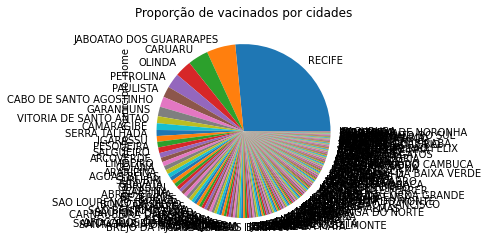

In [7]:
dados.estabelecimento_municipio_nome.value_counts(normalize="true").plot(kind="pie").set_title("Proporção de vacinados por cidades")

In [8]:
## 30 cidades que mais vacinaram no estado de Pernambuco 

dados.estabelecimento_municipio_nome.value_counts().head(30)

RECIFE                     505344
JABOATAO DOS GUARARAPES    102037
CARUARU                     72535
OLINDA                      59362
PETROLINA                   52403
PAULISTA                    38552
CABO DE SANTO AGOSTINHO     36505
GARANHUNS                   33652
VITORIA DE SANTO ANTAO      24886
CAMARAGIBE                  23639
SERRA TALHADA               21246
IGARASSU                    20458
PESQUEIRA                   19976
SALGUEIRO                   19959
ARCOVERDE                   17212
LIMOEIRO                    15754
GOIANA                      15393
ARARIPINA                   15359
AGUAS BELAS                 15096
SURUBIM                     13891
GRAVATA                     13682
OURICURI                    13631
CARPINA                     13554
ABREU E LIMA                12135
BEZERROS                    11823
BUIQUE                      11768
SAO LOURENCO DA MATA        11732
BOM CONSELHO                11548
PALMARES                    11392
TIMBAUBA      

Sobre os vacinados

In [9]:
## Quantidade de vacinados por sexo biologico 

dados.paciente_enumSexoBiologico.value_counts()

F    1148979
M     756569
Name: paciente_enumSexoBiologico, dtype: int64

Text(0.5, 1.0, 'Vacinados por sexo')

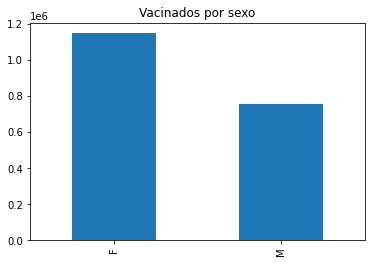

In [16]:
# Gráfico de pizza proporção dos vacinados por sexo 

dados.paciente_enumSexoBiologico.value_counts().plot(kind='bar').set_title("Vacinados por sexo")

In [11]:
# Quantidade de vacinados por idade até os 60 anos

dados["paciente_idade"].value_counts().sort_index(ascending="false").head(60)

0         2
1         4
2         1
3         1
4         2
5         5
6         3
7         3
9         3
10        1
12        2
13        2
14        9
15        3
16       10
17       54
18     2991
19     4258
20     5608
21     7170
22     8418
23    10175
24    10988
25    11971
26    12046
27    12235
28    12325
29    12607
30    12502
31    13676
32    14067
33    14249
34    14667
35    14418
36    13621
37    14528
38    15293
39    15384
40    14739
41    14058
42    13493
43    12872
44    12640
45    11823
46    11652
47    11243
48    11012
49    10044
50    10256
51    10083
52     9523
53     8917
54     8789
55     8334
56     8215
57     7641
58     7024
59     7089
60    38605
61    42600
Name: paciente_idade, dtype: int64

In [17]:
dados["paciente_idade"].value_counts().head(60)

70    82591
71    78781
65    75508
72    74209
66    73131
73    71447
67    69423
68    68705
69    67081
74    62162
64    58804
75    55643
76    52010
63    51861
77    48230
62    47657
78    43322
61    42600
60    38605
79    36623
80    34993
81    30099
82    24878
83    22525
85    19861
84    19623
86    15681
39    15384
38    15293
40    14739
34    14667
37    14528
35    14418
33    14249
32    14067
41    14058
31    13676
36    13621
42    13493
43    12872
44    12640
29    12607
30    12502
28    12325
27    12235
26    12046
25    11971
45    11823
87    11752
46    11652
88    11435
47    11243
48    11012
24    10988
50    10256
23    10175
51    10083
49    10044
89     9914
90     9654
Name: paciente_idade, dtype: int64

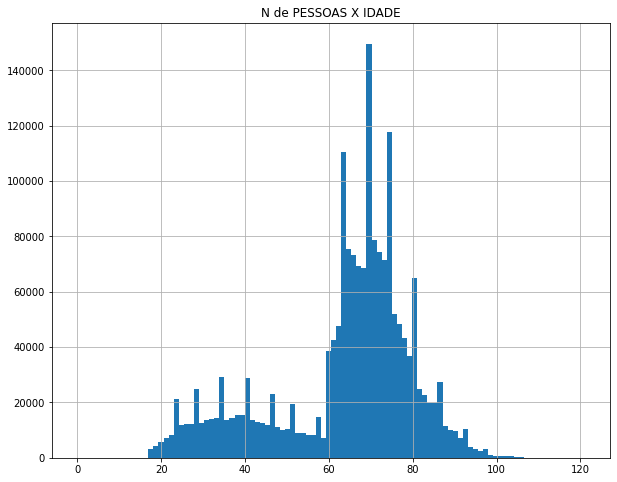

In [12]:
##  Grafico de barras quantidade de pessoas por faixa etaria(N de pessoas x idade)

dados["paciente_idade"].hist(bins=100,figsize=(10,8)).set_title("N de PESSOAS X IDADE");

In [13]:
## Dados de raça entre os vacinados 

dados["paciente_racaCor_valor"].value_counts()

SEM INFORMACAO    585737
PARDA             464705
AMARELA           406310
BRANCA            343612
PRETA              64042
INDIGENA           41142
Name: paciente_racaCor_valor, dtype: int64

Text(0.5, 1.0, 'Raça/Cor auto declarada do vacinado')

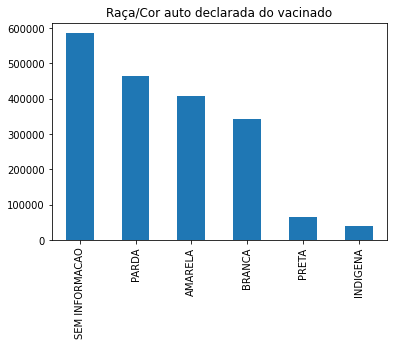

In [14]:
## Grafico de barras proporção de vacinados por raça

dados.paciente_racaCor_valor.value_counts().plot(kind='bar').set_title("Raça/Cor auto declarada do vacinado")

In [15]:
## Categoria de vacinação "Grupos prioritarios"

dados["vacina_categoria_nome"].value_counts()

Faixa Etária                                       1358688
Trabalhadores de Saúde                              406742
Povos Indígenas                                      46523
Pessoas de 60 anos ou mais institucionalizadas       43126
Povos e Comunidades Tradicionais                     32838
Forças de Segurança e Salvamento                      6218
Comorbidades                                          5518
Trabalhadores da Educação                             1509
Pessoas com Deficiência                               1402
Trabalhadores Portuários                                47
Funcionário do Sistema de Privação de Liberdade         40
Trabalhadores Industriais                               23
Forças Armadas (membros ativos)                         15
Pessoas em Situação de Rua                               8
População Privada de Liberdade                           5
Name: vacina_categoria_nome, dtype: int64

In [ ]:
# categoria da vacinação "Categorias de atendimento dos grupos prioritarios"

dados["vacina_grupoAtendimento_nome"].value_counts().head(40)

Pessoas de 65 a 69 anos                                                      346746
Pessoas de 70 a 74 anos                                                      340751
Pessoas de 75 a 79 anos                                                      237583
Outros                                                                       236965
Pessoas de 80 anos ou mais                                                   229546
Pessoas de 60 a 64 anos                                                      204062
Povos indígenas em terras indígenas                                           46523
Técnico de Enfermagem                                                         45011
Pessoas de 60 nos ou mais Institucionalizadas                                 43126
Quilombola                                                                    32835
Enfermeiro(a)                                                                 18383
Recepcionista                                                               

In [ ]:
# Vacinas utilizadas --------------------- Não usar -- Dados confusos (?????????Ministerio da saúde??????) ----------------------

dados.vacina_fabricante_nome.value_counts()

FUNDACAO BUTANTAN               1134997
SERUM INSTITUTE OF INDIA LTD     352989
FUNDACAO OSWALDO CRUZ            301338
SINOVAC LIFE SCIENCE CO LTD       87805
MINISTERIO DA SAUDE               28269
BioNTech/Fosun Pharma/Pfizer        138
Janssen-Cilag                        12
Name: vacina_fabricante_nome, dtype: int64

TESTES DE DADOS

In [ ]:
dados.query()